In [12]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

# Dataframe cleaning

In [13]:
def team_features(df):
    df["avg_rank_blue_team"] = df[["rank_player_" + str(i) for i in range(1, 6)]].mean(axis=1)
    df["avg_rank_red_team"] = df[["rank_player_" + str(i) for i in range(6, 11)]].mean(axis=1)
    df["avg_winrate_blue_team"] = df[["winrate_player_"+str(i) for i in range(1, 6)]].mean(axis=1)
    df["avg_winrate_red_team"] = df[["winrate_player_" + str(i) for i in range(6, 11)]].mean(axis=1)
    df["avg_kda_blue_team"] = df[["mean_kda_player_" + str(i) for i in range(1, 6)]].mean(axis=1)
    df["avg_kda_red_team"] = df[["mean_kda_player_" + str(i) for i in range(6, 11)]].mean(axis=1)
    df["avg_gpm_blue_team"] = df[["mean_gpm_player_" + str(i) for i in range(1, 6)]].mean(axis=1)
    df["avg_gpm_red_team"] = df[["mean_gpm_player_" + str(i) for i in range(6, 11)]].mean(axis=1)
    df["avg_cs_blue_team"] = df[["mean_cs_player_" + str(i) for i in range(1, 6)]].mean(axis=1)
    df["avg_cs_red_team"] = df[["mean_cs_player_" + str(i) for i in range(6, 11)]].mean(axis=1)
    df["nb_autofill_blue_team"] = df[["autofill_player_" + str(i) for i in range(1, 6)]].sum(axis=1)
    df["nb_autofill_red_team"] = df[["autofill_player_" + str(i) for i in range(6, 11)]].sum(axis=1)
    return df

In [14]:
df = pd.read_csv("../saved_data/match_data.csv")
df = df.dropna()
df = team_features(df)
df = df[["avg_rank_blue_team", "avg_rank_red_team", "avg_winrate_blue_team",
        "avg_winrate_red_team", "avg_kda_blue_team", "avg_kda_red_team",
            "avg_gpm_blue_team", "avg_gpm_red_team", "avg_cs_blue_team",
                "avg_cs_red_team", "nb_autofill_blue_team", "nb_autofill_red_team", "win"]] 

In [15]:
df.head()

,avg_rank_blue_team,avg_rank_red_team,avg_winrate_blue_team,avg_winrate_red_team,avg_kda_blue_team,avg_kda_red_team,avg_gpm_blue_team,avg_gpm_red_team,avg_cs_blue_team,avg_cs_red_team,nb_autofill_blue_team,nb_autofill_red_team,win
0,13.20,12.20,0.48,0.52,2.64,2.55,436.41,435.19,149.90,125.65,1.00,1.00,1
1,12.40,11.60,0.49,0.44,3.42,2.97,420.48,384.59,118.74,101.96,1.00,0.00,1
2,9.20,11.40,0.49,0.47,2.22,2.08,387.78,385.21,107.72,131.80,1.00,0.00,-1
3,13.60,14.80,0.48,0.49,2.08,3.11,408.28,418.60,131.21,157.05,0.00,0.00,-1
4,24.20,24.40,0.52,0.54,2.38,2.33,395.45,375.14,127.08,101.72,0.00,0.00,1


# Features correlation

<AxesSubplot: >

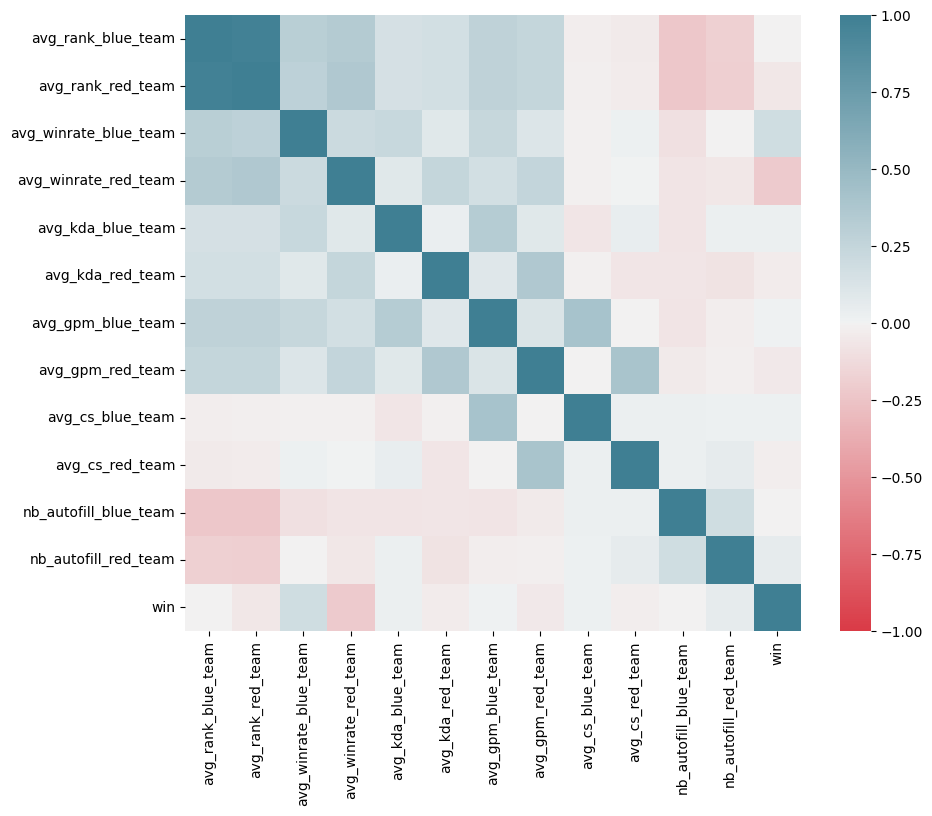

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(10, 220, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

# Model selection

In [17]:
X = df.loc[:, df.columns!= "win"]
y = df[["win"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=123)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 11.18it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.65,0.65,0.65,0.65,0.03
LinearDiscriminantAnalysis,0.65,0.65,0.65,0.65,0.04
RidgeClassifierCV,0.65,0.65,0.65,0.65,0.03
RidgeClassifier,0.65,0.65,0.65,0.65,0.03
CalibratedClassifierCV,0.64,0.64,0.64,0.64,0.22
LinearSVC,0.64,0.64,0.64,0.64,0.06
SVC,0.64,0.64,0.64,0.64,0.18
SGDClassifier,0.63,0.63,0.63,0.63,0.02
LGBMClassifier,0.63,0.63,0.63,0.63,0.19


According to lazypredict, the LogisticRegression is the most suitable classifier for our case.
Let's try it:

In [18]:
model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
model.fit(X_train, y_train)
print("Accuracy of the logistic regression : " + str(accuracy_score(y_test, model.predict(X_test))))

Accuracy of the logistic regression : 0.6449579831932774


In [19]:
pd.DataFrame({'coeff': model.coef_[0]}, 
             index=X.columns)

,coeff
avg_rank_blue_team,0.55
avg_rank_red_team,-0.56
avg_winrate_blue_team,18.22
avg_winrate_red_team,-18.06
avg_kda_blue_team,-0.03
avg_kda_red_team,-0.04
avg_gpm_blue_team,0.00
avg_gpm_red_team,-0.00
avg_cs_blue_team,0.00
avg_cs_red_team,-0.00


Thus, the winrate seems to be the most impactful variable. 
While the coefficient related to nb_autofill_blue is of the wrong sign.

# Simplified model

Let's keep only the 4 most impactful features, which are : avg_rank_blue_team, avg_rank_red_team, avg_winrate_blue_team and avg_winrate_red_team

In [20]:
X_simplified = df[["avg_rank_blue_team", "avg_rank_red_team", "avg_winrate_blue_team",
        "avg_winrate_red_team"]]

In [21]:
X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = train_test_split(X_simplified, y, test_size=.5, random_state=123)
model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
model.fit(X_train_simplified, y_train_simplified)
print("Accuracy of the simplified logistic regression : " + str(accuracy_score(y_test_simplified, model.predict(X_test_simplified))))

Accuracy of the simplified logistic regression : 0.6628151260504201


We will finally save this simple model.

In [23]:
filename = '../saved_data/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))